In [21]:
import pandas as pd
import numpy as np
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt
import glob

### Data loading and preprocessing

In [36]:
data_path = "/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/"
merged_df = []
for file_name in glob.glob(data_path+'*.csv'):
    print(file_name)
    df = pd.read_csv(file_name)
    merged_df.append(df)
    # print(df.columns)
    # df = pd.concat([df, pd.read_csv(file_name)],axis=0, ignore_index=True, sort=False)
df = pd.concat(merged_df)

/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/P31.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/Discovery_World_Day2.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/P30.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/Discovery_World_Day1.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/P29.csv


In [37]:
df.columns

Index(['user_id', 'name', 'age', 'location', 'used_hand', 'study_id',
       'study_day', 'try_allowed', 'try_number', 'try_remaining',
       'study_start', 'study_end', 'game_type', 'star_time', 'end_time',
       'total_time', 'data'],
      dtype='object')

In [24]:
df = df[['user_id', 'name', 'age', 'location', 'used_hand', 'study_id',
       'study_day', 'try_allowed', 'try_number', 'try_remaining',
       'study_start', 'study_end', 'game_type', 'star_time', 'end_time',
       'total_time', 'data']]

#### Utility functions

In [28]:
from datetime import date
from datetime import datetime
'''
Calculate time difference in seconds between two time
Input: t1, t2
Return: time difference in seconds
'''
def time_diff(t1, t2):
    a = datetime.fromisoformat(t1)
    b = datetime.fromisoformat(t2)
    return (b - a).total_seconds() # in seconds

'''
Calculate age in the year fromate from DoB (if DoB present in the age column)
Input: born (in %Y-%m-%d format)
Return: Age (in Year)
'''
def calculate_age(born):
    if(not isinstance(born, str)):
        return int(born)
    born = datetime.strptime(born, '%Y-%m-%d')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [29]:
df_tap = df[df['game_type'] == "morse_code"] ## Select Secret Message game data
df_tap["age"] = df_tap.apply(lambda x: calculate_age(x.age), axis=1)


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_14217/140427202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tap["age"] = df_tap.apply(lambda x: calculate_age(x.age), axis=1)


In [30]:
df_tap["time_diff"] = df_tap.apply(lambda x: time_diff(x.star_time, x.end_time), axis=1)

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_14217/2308884637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tap["time_diff"] = df_tap.apply(lambda x: time_diff(x.star_time, x.end_time), axis=1)


### Single trial data analysis

In [31]:
df_tap = df_tap.iloc[:-1] # Select a trial
df_tap

,user_id,name,age,location,used_hand,study_id,study_day,try_allowed,try_number,try_remaining,study_start,study_end,game_type,star_time,end_time,total_time,data,time_diff
13,BV4KUO,P31,8,Lab,Right,19,Day-1,50,18,32,2023-06-19 19:04:05.183477+00:00,2023-06-19 19:23:11.666561+00:00,morse_code,2023-06-19 14:15:17+00:00,2023-06-19 14:18:18+00:00,181,"[""right_handmove"": [""time"": [""2023-06-19 14:15...",181.0
15,BV4KUO,P31,8,Lab,Right,19,Day-1,50,18,32,2023-06-19 19:04:05.183477+00:00,2023-06-19 19:23:11.666561+00:00,morse_code,2023-06-19 14:18:27+00:00,2023-06-19 14:21:28+00:00,181,"[""left_handmove"": [""type"": [""#SWAP#""], ""time"":...",181.0
9,6BTOLJ,P22,10,Indoor,Right,36,Day-1,100,29,71,2023-11-16 15:14:25.662251+00:00,2023-11-16 17:51:17.197257+00:00,morse_code,2023-11-16 10:25:21+00:00,2023-11-16 10:28:22+00:00,181,"[""left_handmove"": [""type"": [""Tap"", ""Move Insid...",181.0
10,6BTOLJ,P23,9,Indoor,Right,36,Day-1,100,29,71,2023-11-16 15:14:25.662251+00:00,2023-11-16 17:51:17.197257+00:00,morse_code,2023-11-16 10:28:32+00:00,2023-11-16 10:31:33+00:00,181,"[""right_handmove"": [""time"": [""2023-11-16 10:28...",181.0
13,6BTOLJ,P25,8,Indoor,Right,36,Day-1,100,29,71,2023-11-16 15:14:25.662251+00:00,2023-11-16 17:51:17.197257+00:00,morse_code,2023-11-16 10:40:56+00:00,2023-11-16 10:43:57+00:00,181,"[""morse_text"": ""A eagle is in the nest. The \...",181.0
26,6BTOLJ,P27,8,Indoor,Right,36,Day-1,100,29,71,2023-11-16 15:14:25.662251+00:00,2023-11-16 17:51:17.197257+00:00,morse_code,2023-11-16 11:00:32+00:00,2023-11-16 11:03:33+00:00,181,"[""morse_text"": ""I love my new pets. The cat si...",181.0
28,6BTOLJ,P28,14,Indoor,Right,36,Day-1,100,29,71,2023-11-16 15:14:25.662251+00:00,2023-11-16 17:51:17.197257+00:00,morse_code,2023-11-16 11:48:15+00:00,2023-11-16 11:51:16+00:00,181,"[""right_handmove"": [""type"": [""Tap"", ""Release"",...",181.0
1,ZURFW1,P30,12,Lab,Right,21,Day-1,50,18,32,2023-06-20 19:58:54.194268+00:00,2023-06-20 20:19:30.368469+00:00,morse_code,2023-06-20 15:04:33+00:00,2023-06-20 15:07:34+00:00,181,"[""right_handmove"": [""type"": [""Tap"", ""Release"",...",181.0
0,17W8X3,P2,8,Indoor,Right,35,Day-1,100,41,59,2023-11-16 15:13:57.830133+00:00,2023-11-16 17:49:38.651387+00:00,morse_code,2023-11-16 09:46:16+00:00,2023-11-16 09:49:17+00:00,181,"[""error"": [""char"": [""J"", ""J"", ""J"", ""J"", ""J"", ""...",181.0
7,17W8X3,P4,10,Indoor,Right,35,Day-1,100,41,59,2023-11-16 15:13:57.830133+00:00,2023-11-16 17:49:38.651387+00:00,morse_code,2023-11-16 09:51:11+00:00,2023-11-16 09:54:12+00:00,181,"[""morse_text"": ""We go \n "", ""left_handmove"": ...",181.0


#### Data pre-processing

In [34]:
import re
patterns = ["right_handmove", "left_handmove", "morse_text", "error"]
def get_movement(data):
    # print(eval(data))
    index = {}
    seg = {}
    for p in patterns:
        index[p] =[match.start() for match in re.finditer(p, data)][0]
    index = dict(sorted(index.items(), key=lambda item: item[1]))
    keys = list(index.keys())
    values = list(index.values())
    print(keys, values)
    seg[keys[0]] = data[values[0]+len(keys[0])+3 :values[1]-3].strip()
    seg[keys[1]] = data[values[1]+len(keys[1])+3 :values[2]-3].strip()
    seg[keys[2]] = data[values[2]+len(keys[2])+3 :values[3]-3].strip()
    seg[keys[3]] = data[values[3]+len(keys[3])+3 :-1].strip()
    # print(seg)
    swap_index = 0
    tap_hand_type = []
    tap_hand_time = []
    fix_hand_type = []
    fix_hand_time = []
    error_code = []
    error_char = []
    error_time = []
    morse_text = ""
    for p in patterns:
        temp = seg[p]
        if(temp[0] == "[" and temp[-1]=="]"):
            temp = "{" + temp[1:-1] + "}"
        if(p == patterns[0]): ## Right Hand try, Tap-> Right, Fix->left
            # "#SWAP#" used in data when hand changed
            dict_ = eval(temp)
            idx_type = dict_["type"].index("#SWAP#")
            idx_time = dict_["time"].index("#SWAP#")
            # print(idx_type, idx_time)
            tap_hand_type = dict_["type"][:idx_type] + dict_["type"][idx_type+1:] # Tap Hand
            tap_hand_time = dict_["time"][:idx_time] + dict_["time"][idx_type+1:] # # Tap Hand
            # fix_hand_type = dict_["type"][idx_type+1:] # Fix Hand
            # fix_hand_time = dict_["time"][idx_type+1:] # Fix Hand
        if(p == patterns[1]):
            dict_ = eval(temp)
            idx_type = dict_["type"].index("#SWAP#")
            idx_time = dict_["time"].index("#SWAP#")
            print(idx_type, idx_time)
            fix_hand_type = dict_["type"][:idx_type] + dict_["type"][idx_type+1:] # Fix Hand
            fix_hand_time = dict_["time"][:idx_type] + dict_["time"][idx_time+1:] # Fix Hand
            # tap_hand_type = tap_hand_type + dict_["type"][idx_type+1:] # Tap Hand
            # tap_hand_time = tap_hand_time + dict_["time"][idx_time+1:] # # Tap Hand
        if(p == patterns[2]):
            morse_text = eval(temp)
        if(p == patterns[3]):
            dict_ = eval(temp)
            idx_ = dict_["code"].index("#SWAP#")
            dict_["code"].pop(idx_)
            dict_["char"].pop(idx_)
            dict_["time"].pop(idx_)
            # print(dict_["code"])
            error_code = dict_["code"]
            error_char = dict_["char"]
            error_time = dict_["time"]
    print(error_code, error_char, error_time, morse_text)
    return tap_hand_type, tap_hand_time, fix_hand_type, fix_hand_time, error_code, error_char, error_time, morse_text

In [33]:
df_tap[["tap_hand_type", "tap_hand_time", "fix_hand_type", "fix_hand_time", "error_code", "error_char", "error_time", "morse_text"]] = df_tap.apply(lambda x: get_movement(x.data), axis=1, result_type="expand")

['right_handmove', 'error', 'left_handmove', 'morse_text'] [2, 8646, 9363, 30195]
310 310
['.', '.', '.', '-', '.', '-', '.', '-', '.', '.', '.', '.', '-', '.', '.', '.', '.'] ['A', 'A', 'A', 'A', 'c', 't', 'a', 't', 's', 'w', 'w', 'r', 'd', 'i', 'p', 'p', 'c'] ['2023-06-19 14:15:22.5150', '2023-06-19 14:15:32.3840', '2023-06-19 14:15:40.8220', '2023-06-19 14:15:43.4000', '2023-06-19 14:15:54.2250', '2023-06-19 14:16:04.7720', '2023-06-19 14:16:35.1270', '2023-06-19 14:16:37.7520', '2023-06-19 14:16:40.7480', '2023-06-19 14:17:01.0460', '2023-06-19 14:17:03.5540', '2023-06-19 14:17:13.7000', '2023-06-19 14:17:31.2990', '2023-06-19 14:17:48.3680', '2023-06-19 14:17:50.8530', '2023-06-19 14:17:55.5420', '2023-06-19 14:18:04.0930'] A cat jump. Cats h 
 ate water. The birds crip. A cat j
['left_handmove', 'morse_text', 'right_handmove', 'error'] [2, 61, 83, 143]
0 0
[] [] []  
 
['left_handmove', 'right_handmove', 'morse_text', 'error'] [2, 9634, 14134, 14181]
125 125
['-', '-', '.', '.', 

In [35]:
df_tap.columns

Index(['user_id', 'name', 'age', 'location', 'used_hand', 'study_id',
       'study_day', 'try_allowed', 'try_number', 'try_remaining',
       'study_start', 'study_end', 'game_type', 'star_time', 'end_time',
       'total_time', 'data', 'time_diff', 'tap_hand_type', 'tap_hand_time',
       'fix_hand_type', 'fix_hand_time', 'error_code', 'error_char',
       'error_time', 'morse_text'],
      dtype='object')

In [17]:
df_tap[["tap_hand_type", "tap_hand_time", "fix_hand_type", "fix_hand_time", "error_code", "error_char", "error_time", "morse_text"]]

,tap_hand_type,tap_hand_time,fix_hand_type,fix_hand_time,error_code,error_char,error_time,morse_text
13,"[Tap, Release, Tap, Release, Tap, Release, Tap...","[2023-06-19 14:15:17.7270, 2023-06-19 14:15:22...","[Tap, Move Inside, Move Inside, Move Inside, M...","[2023-06-19 14:15:11.7620, 2023-06-19 14:15:12...","[., ., ., -, ., -, ., -, ., ., ., ., -, ., ., ...","[A, A, A, A, c, t, a, t, s, w, w, r, d, i, p, ...","[2023-06-19 14:15:22.5150, 2023-06-19 14:15:32...",A cat jump. Cats h \n ate water. The birds cri...
15,[],[],[],[],[],[],[],\n
9,"[Tap, Release, Tap, Release, Tap, Release, Tap...","[2023-11-16 10:25:27.1770, 2023-11-16 10:25:27...","[Tap, Move Inside, Move Inside, Move Inside, M...","[2023-11-16 10:25:25.7130, 2023-11-16 10:25:26...","[-, -, ., ., ., .]","[L, g, C, C, C, C]","[2023-11-16 10:25:29.0360, 2023-11-16 10:26:33...",Luke can pull the wagon. \n
10,"[Tap, Release, Tap, Release, Tap, Release, Tap...","[2023-11-16 10:28:33.8910, 2023-11-16 10:28:33...","[Tap, Move Inside, Move Inside, Move Inside, M...","[2023-11-16 10:28:32.3160, 2023-11-16 10:28:32...","[., -, ., -, ., .]","[e, a, p, g, g, p]","[2023-11-16 10:28:42.3560, 2023-11-16 10:28:55...",A red van is here. We go for a ride. The pi \n...
13,"[Tap, Release, Tap, Release, Tap, Release, Tap...","[2023-11-16 10:40:58.1190, 2023-11-16 10:40:58...","[Tap, Move Inside, Move Inside, Move Inside, M...","[2023-11-16 10:40:58.4270, 2023-11-16 10:40:58...","[-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...","[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ...","[2023-11-16 10:40:58.2490, 2023-11-16 10:40:58...",A eagle is in the nest. The \n
26,"[Tap, Release, Tap, Release, Tap, Release, Tap...","[2023-11-16 11:00:33.3290, 2023-11-16 11:00:33...","[Tap, Move Inside, Move Inside, Move Inside, M...","[2023-11-16 11:00:35.1160, 2023-11-16 11:00:35...","[., ., ., ., -, -, ., -, -, ., ., -, ., -, ., ...","[I, l, l, l, o, o, e, m, w, p, p, t, s, T, h, ...","[2023-11-16 11:00:33.9510, 2023-11-16 11:00:35...",I love my new pets. The cat sits on the ma \n ...
28,"[Tap, Release, Tap, Release, Tap, Release, Tap...","[2023-11-16 11:48:25.4680, 2023-11-16 11:48:25...","[Tap, Move Inside, Move Inside, Move Inside, M...","[2023-11-16 11:48:24.0530, 2023-11-16 11:48:26...","[-, -, -, -, -, -, -, -, -, ., -, -, -, -, -, -]","[g, g, g, g, p, o, c, t, y, l, l, k, c, j, b, b]","[2023-11-16 11:48:39.5600, 2023-11-16 11:48:40...",The pig gulps his food. The cat sits on the ma...
1,"[Tap, Release, Tap, Release, Tap, Release, Tap...","[2023-06-20 15:04:36.1840, 2023-06-20 15:04:36...","[Tap, Move Inside, Move Inside, Move Inside, M...","[2023-06-20 15:04:38.0260, 2023-06-20 15:04:38...","[-, -, ., -, -]","[A, A, l, o, o]","[2023-06-20 15:04:41.3030, 2023-06-20 15:04:43...",A cat jump. I love my new pets. T \n he pig gu...
0,"[Tap, Release, Tap, Release, Tap, Release, Tap...","[2023-11-16 09:46:16.1420, 2023-11-16 09:46:16...","[Tap, Release, Tap, Release, Tap, Release, Tap...","[2023-11-16 09:46:16.1890, 2023-11-16 09:46:16...","[-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...","[J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, ...","[2023-11-16 09:46:19.6110, 2023-11-16 09:46:19...",Jodie \n can ride the blu
7,"[Tap, Release, Tap, Release, Tap, Release, Tap...","[2023-11-16 09:51:13.2060, 2023-11-16 09:51:13...","[Tap, Release, Tap, Move Inside, Move Inside, ...","[2023-11-16 09:51:19.6330, 2023-11-16 09:51:19...",[],[],[],We go \n


In [65]:
def time_diff_convert_list(time_list, start_time): 
    time_conv = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f') for x in time_list]
    b = datetime.fromisoformat(start_time)
    naive = b.replace(tzinfo=None)
    return [(a - naive).total_seconds() for a in time_conv] # in seconds

In [66]:
df_tap["tap_hand_time_ss"] = df_tap.apply(lambda x: time_diff_convert_list(x["tap_hand_time"], x["star_time"]), axis=1)
df_tap["fix_hand_time_ss"] = df_tap.apply(lambda x: time_diff_convert_list(x["fix_hand_time"], x["star_time"]), axis=1)
df_tap["error_time_ss"] = df_tap.apply(lambda x: time_diff_convert_list(x["error_time"], x["star_time"]), axis=1)

#### A single trial scoring analysis

In [215]:
import random
def tapping_color_state(type_list):
    color = ['blue' if x=="Tap" else 'black' for x in type_list]
    marker = ['^' if x=="Tap" else 'v' for x in type_list]
    state = [random.uniform(4.0, 4.9) if x=="Tap" else random.uniform(3.0, 3.9) for x in type_list]
    # color = ['blue' if x=="Tap" for x in type_list]
    # marker = ['^' if x=="Tap" for x in type_list]
    # state = [random.uniform(3.0, 3.9) if x=="Tap" for x in type_list]
    return color, marker, state
def fix_color_state(type_list):
    color = []
    marker = []
    state = []
    for move in type_list:
        if move=="Tap":
            marker.append('o')
            color.append("darkgreen")
            state.append(random.uniform(6.0, 6.9))
        if move=="Release":
            marker.append('s')
            color.append("lawngreen")
            state.append(random.uniform(5.0, 5.9))
        if move=="Move Inside":
            marker.append('+')
            color.append("darkgoldenrod")
            state.append(random.uniform(2.0, 2.9))
        if move=="Move Outside":
            marker.append('d')
            color.append("firebrick")
            state.append(random.uniform(1.0, 1.9))
    return color, marker, state

In [216]:
df_tap[["tap_color", "tap_marker", "tap_state"]] = df_tap.apply(lambda x: tapping_color_state(x["tap_hand_type"]), axis=1, result_type="expand")
df_tap[["fix_color", "fix_marker", "fix_state"]] = df_tap.apply(lambda x: fix_color_state(x["fix_hand_type"]), axis=1, result_type="expand")

In [217]:
df_tap[["tap_color", "tap_state", "tap_marker", "fix_state", "fix_marker"]]

,tap_color,tap_state,tap_marker,fix_state,fix_marker
8,"[blue, black, blue, black, blue, black, blue, ...","[4.321322266537029, 3.34143835114097, 4.304046...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[6.026342125086923, 2.092435148379963, 2.58722...","[o, +, +, +, +, +, +, +, +, +, +, +, +, +, +, ..."
0,"[blue, black, blue, black, blue, black, blue, ...","[4.1775191458039584, 3.3148445631207193, 4.194...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[6.325429052258631, 5.886353613436874, 6.27234...","[o, s, o, s, o, s, o, s, o, s, o, s, o, +, +, ..."
26,"[blue, black, blue, black, blue, black, blue, ...","[4.006687786326634, 3.591831032693694, 4.88275...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[6.501598842577262, 2.1134525442477385, 2.5906...","[o, +, +, +, +, +, +, +, +, +, +, +, +, +, +, ..."
13,"[blue, black, blue, black, blue, black, blue, ...","[4.3268267015189625, 3.7305053471781195, 4.166...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[6.450851101342009, 2.388330169131722, 2.68637...","[o, +, +, +, +, +, +, s, o, s, o, s, o, +, +, ..."
13,"[blue, black, blue, black, blue, black, blue, ...","[4.1574215122173035, 3.0074123869933747, 4.588...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[6.848935985407053, 2.879142762483182, 2.07836...","[o, +, +, +, +, +, +, +, +, +, +, +, +, +, +, ..."
10,"[blue, black, blue, black, blue, black, blue, ...","[4.043402463374232, 3.4632072144206867, 4.6741...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[6.69888019004964, 2.6584720685032237, 2.05199...","[o, +, +, +, +, +, +, +, +, +, +, +, +, +, +, ..."
29,"[blue, black, blue, black, blue, black, blue, ...","[4.327502166176651, 3.5504734043533412, 4.1583...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[6.648010037178933, 2.6826464019827934, 2.1568...","[o, +, +, +, +, +, +, +, +, +, +, +, +, +, +, ..."
9,"[blue, black, blue, black, blue, black, blue, ...","[4.429746350125905, 3.168264316942235, 4.39456...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[6.16693313532077, 2.6149916235388617, 2.04303...","[o, +, +, +, +, +, +, +, +, +, +, +, +, s, o, ..."
7,"[blue, black, blue, black, blue, black, blue, ...","[4.34612199266978, 3.292997374669183, 4.617053...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[6.092115102316321, 5.525991725806408, 6.72508...","[o, s, o, +, +, +, +, +, +, +, +, +, +, +, +, ..."
1,"[blue, black, blue, black, blue, black, blue, ...","[4.624193746498754, 3.282708430513427, 4.44741...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[6.016902317864349, 2.8840735631559253, 2.5568...","[o, +, +, +, +, +, +, +, +, +, +, +, +, +, +, ..."


In [218]:
df_ex = df_tap.iloc[11]
df_ex

user_id                                                        6BTOLJ
name                                                              P28
age                                                                14
location                                                       Indoor
used_hand                                                       Right
study_id                                                         36.0
study_day                                                       Day-1
try_allowed                                                     100.0
try_number                                                       29.0
try_remaining                                                    71.0
study_start                          2023-11-16 15:14:25.662251+00:00
study_end                            2023-11-16 17:51:17.197257+00:00
game_type                                                  morse_code
star_time                                   2023-11-16 11:48:15+00:00
end_time            

In [219]:
from collections import Counter
count = []
count.append(df_ex["tap_hand_type"].count("Tap"))
count.append(df_ex["tap_hand_type"].count("Release"))
# count.append(df_ex["fix_hand_type"].count("Tap"))
# count.append(df_ex["fix_hand_type"].count("Release"))
count.append(df_ex["fix_hand_type"].count("Move Inside"))
count.append(df_ex["fix_hand_type"].count("Move Outside"))
count.append(len(df_ex["error_code"]))
avg_ = [round(float(i/180.0), 2) for i in count]
count

[231, 230, 940, 2, 16]

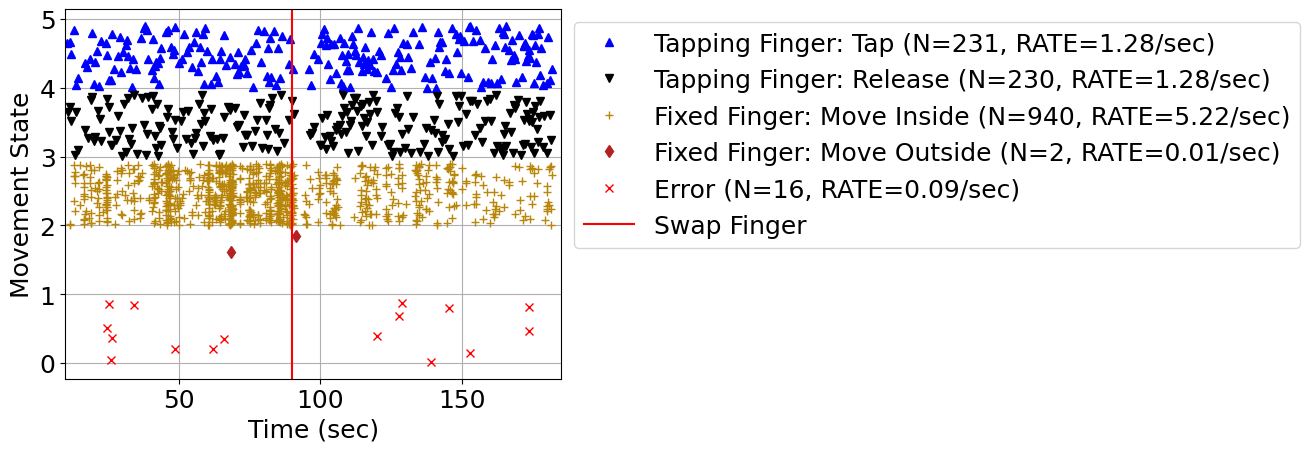

In [220]:
import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline
import random
import matplotlib.patches as mpatches
# plt.rc('font', size=14)
plt.rcParams.update({'font.size': 18})

rng = np.random.RandomState(0)
for i in range(len(df_ex["tap_state"])):
    if(df_ex["tap_state"][i]<5):
        plt.plot(df_ex["tap_hand_time_ss"][i], df_ex["tap_state"][i], df_ex["tap_marker"][i], color=df_ex["tap_color"][i])

for i in range(len(df_ex["fix_state"])):
    if(df_ex["fix_state"][i]<3):
        plt.plot(df_ex["fix_hand_time_ss"][i], df_ex["fix_state"][i], df_ex["fix_marker"][i], color=df_ex["fix_color"][i])  

for i in range(len(df_ex["error_time_ss"])):
    plt.plot(df_ex["error_time_ss"][i], [random.uniform(0, 0.9)], 'x', color="red")  



# for i, row in df_lefthend.iterrows():
#     plt.plot(row["time_reverse"], [row["state"]], row["marker"], color=row["color"])

# for i, row in df_error.iterrows():
#     plt.plot(row["time_reverse"], [random.uniform(0, 0.9)], 'x', color="red")

# color = ['blue', 'black', 'darkgreen', 'lawngreen', 'darkgoldenrod', 'firebrick', 'red']
# label = ['Tapping Finger: Tap', 'Tapping Finger: Release', 'Fixed Finger: Tap', 'Fixed Finger: Release', 'Fixed Finger: Move Inside', 'Fixed Finger: Move Outside', 'Error' ]
color = ['blue', 'black', 'darkgoldenrod', 'firebrick', 'red']
label = ['Tapping Finger: Tap', 'Tapping Finger: Release', 'Fixed Finger: Move Inside', 'Fixed Finger: Move Outside', 'Error' ]

i=0
# plt.plot(label="Secret Message: "+ df_ex["morse_text"])
# for marker in ['^', 'v', 'o', 's', '+', 'd',  'x']:
for marker in ['^', 'v', '+', 'd',  'x']:
    plt.plot(rng.rand(0), rng.rand(0), marker, color=color[i],
             label=label[i] + " (N={}, RATE={}/sec)".format(count[i], avg_[i]))
    i+=1
plt.axvline(x = 90, color = 'r', label = 'Swap Finger')

plt.legend(numpoints=1)
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Movement State')
plt.xlabel('Time (sec)')
plt.grid()
# plt.title("Secret Message: "+ df_ex["morse_text"])
plt.xlim(10, 185);

### Zoom in 10 seconds movement pattern

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


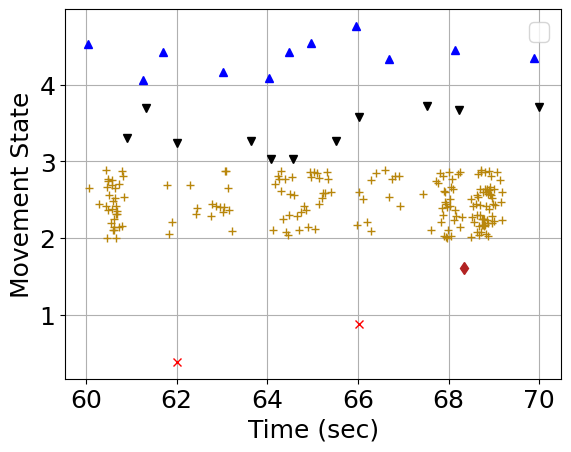

In [221]:
import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline
import random
import matplotlib.patches as mpatches
# plt.rc('font', size=14)
plt.rcParams.update({'font.size': 18})

rng = np.random.RandomState(0)
for i in range(len(df_ex["tap_state"])):
    if(df_ex["tap_state"][i]<5 and (df_ex["tap_hand_time_ss"][i]>60.0 and df_ex["tap_hand_time_ss"][i]<70.0)):
        plt.plot(df_ex["tap_hand_time_ss"][i], df_ex["tap_state"][i], df_ex["tap_marker"][i], color=df_ex["tap_color"][i])

for i in range(len(df_ex["fix_state"])):
    if(df_ex["fix_state"][i]<3 and (df_ex["fix_hand_time_ss"][i]>60.0 and df_ex["fix_hand_time_ss"][i]<70.0)):
        plt.plot(df_ex["fix_hand_time_ss"][i], df_ex["fix_state"][i], df_ex["fix_marker"][i], color=df_ex["fix_color"][i])  

for i in range(len(df_ex["error_time_ss"])):
    if(df_ex["error_time_ss"][i]>60.0 and df_ex["error_time_ss"][i]<70.0):
        plt.plot(df_ex["error_time_ss"][i], [random.uniform(0, 0.9)], 'x', color="red")  



# for i, row in df_lefthend.iterrows():
#     plt.plot(row["time_reverse"], [row["state"]], row["marker"], color=row["color"])

# for i, row in df_error.iterrows():
#     plt.plot(row["time_reverse"], [random.uniform(0, 0.9)], 'x', color="red")

# color = ['blue', 'black', 'darkgreen', 'lawngreen', 'darkgoldenrod', 'firebrick', 'red']
# label = ['Tapping Finger: Tap', 'Tapping Finger: Release', 'Fixed Finger: Tap', 'Fixed Finger: Release', 'Fixed Finger: Move Inside', 'Fixed Finger: Move Outside', 'Error' ]
color = ['blue', 'darkgoldenrod', 'firebrick', 'red']
label = ['Tapping Finger: Tap', 'Fixed Finger: Move Inside', 'Fixed Finger: Move Outside', 'Error' ]

i=0
# plt.plot(label="Secret Message: "+ df_ex["morse_text"])
# for marker in ['^', 'v', 'o', 's', '+', 'd',  'x']:
# for marker in ['^', '+', 'd',  'x']:
#     plt.plot(rng.rand(0), rng.rand(0), marker, color=color[i],
#              label=label[i] + " (N={}, RATE={}/sec)".format(count[i], avg_[i]))
#     i+=1
# plt.axvline(x = 90, color = 'r', label = 'Swap Finger')

plt.legend(numpoints=1)
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Movement State')
plt.xlabel('Time (sec)')
plt.grid()
# plt.title("Secret Message: "+ df_ex["morse_text"])

In [78]:
print("Secret Message: "+ df_ex["morse_text"])

Secret Message: A cat jump. Cats h 
 ate water. The birds crip. A cat j


## All Trials Error Analysis

In [108]:
df_tap = df_tap.sort_values('age')
df_tap

,user_id,name,age,location,used_hand,study_id,study_day,try_allowed,try_number,try_remaining,...,morse_text,tap_hand_time_ss,fix_hand_time_ss,error_time_ss,tap_color,tap_marker,tap_state,fix_color,fix_marker,fix_state
8,CWALSL,Lucille,5,Lab,Right,20.0,Day-1,20.0,9.0,11.0,...,The bi \n r,"[8.557, 8.582, 9.416, 9.442, 14.239, 16.661, 2...","[4.676, 4.797, 4.813, 4.83, 4.847, 4.863, 4.88...","[8.582, 9.442, 26.599, 103.6]","[blue, black, blue, black, blue, black, blue, ...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[3.7912185155136227, 4.129214661420695, 3.8396...","[darkgreen, darkgoldenrod, darkgoldenrod, dark...","[o, +, +, +, +, +, +, +, +, +, +, +, +, +, +, ...","[6.059720094269873, 2.7169856679189466, 2.1655..."
0,17W8X3,P2,8,Indoor,Right,35.0,Day-1,100.0,41.0,59.0,...,Jodie \n can ride the blu,"[0.142, 0.23, 2.583, 3.44, 3.522, 3.611, 3.714...","[0.189, 0.281, 0.386, 0.482, 0.608, 0.69, 0.81...","[3.611, 3.824, 4.102, 4.315, 4.486, 4.678, 5.4...","[blue, black, blue, black, blue, black, blue, ...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[3.2727514771794497, 4.445989320835871, 3.5451...","[darkgreen, lawngreen, darkgreen, lawngreen, d...","[o, s, o, s, o, s, o, s, o, s, o, s, o, +, +, ...","[6.68452409571156, 5.529969861979233, 6.451419..."
26,6BTOLJ,P27,8,Indoor,Right,36.0,Day-1,100.0,29.0,71.0,...,I love my new pets. The cat sits on the ma \n ...,"[1.329, 1.353, 1.414, 1.951, 2.353, 2.641, 3.3...","[3.116, 3.12, 3.128, 3.186, 3.195, 3.211, 3.22...","[1.951, 3.743, 4.895, 7.69, 10.804, 12.297, 20...","[blue, black, blue, black, blue, black, blue, ...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[3.899943881653066, 4.289956852234674, 3.40891...","[darkgreen, darkgoldenrod, darkgoldenrod, dark...","[o, +, +, +, +, +, +, +, +, +, +, +, +, +, +, ...","[6.189072089271849, 2.2202019382136755, 2.8276..."
13,6BTOLJ,P25,8,Indoor,Right,36.0,Day-1,100.0,29.0,71.0,...,A eagle is in the nest. The \n,"[2.119, 2.143, 2.183, 2.249, 2.716, 2.739, 4.6...","[2.427, 2.511, 2.519, 2.527, 2.535, 2.544, 2.5...","[2.249, 2.739, 4.704, 4.917, 5.088, 5.278, 5.4...","[blue, black, blue, black, blue, black, blue, ...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[3.1900516712346714, 4.290972501391953, 3.3803...","[darkgreen, darkgoldenrod, darkgoldenrod, dark...","[o, +, +, +, +, +, +, s, o, s, o, s, o, +, +, ...","[6.617190328014991, 2.1753979556674627, 2.5724..."
13,BV4KUO,Theo,8,Lab,Right,19.0,Day-1,50.0,18.0,32.0,...,A cat jump. Cats h \n ate water. The birds cri...,"[0.727, 5.515, 13.405, 15.384, 22.285, 23.822,...","[-5.238, -4.966, -4.95, -4.933, -4.901, -4.617...","[5.515, 15.384, 23.822, 26.4, 37.225, 47.772, ...","[blue, black, blue, black, blue, black, blue, ...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[3.8779290221127543, 4.583147958183055, 3.2217...","[darkgreen, darkgoldenrod, darkgoldenrod, dark...","[o, +, +, +, +, +, +, +, +, +, +, +, +, +, +, ...","[6.806122140038687, 2.457886935123232, 2.46214..."
10,6BTOLJ,P23,9,Indoor,Right,36.0,Day-1,100.0,29.0,71.0,...,A red van is here. We go for a ride. The pi \n...,"[1.891, 1.914, 3.085, 3.52, 6.791, 6.814, 7.64...","[0.316, 0.834, 0.851, 0.876, 0.909, 0.951, 1.0...","[10.356, 23.888, 79.982, 98.295, 101.623, 110....","[blue, black, blue, black, blue, black, blue, ...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[3.298067359757016, 4.023465485471654, 3.61696...","[darkgreen, darkgoldenrod, darkgoldenrod, dark...","[o, +, +, +, +, +, +, +, +, +, +, +, +, +, +, ...","[6.556649836415986, 2.354674722081658, 2.82251..."
29,17W8X3,P12,9,Indoor,Right,35.0,Day-1,100.0,41.0,59.0,...,A eagle is in the nest. Rats love to eat nuts....,"[5.129, 5.173, 5.343, 5.389, 5.513, 5.581, 5.7...","[1.319, 1.86, 1.877, 1.902, 1.944, 1.977, 2.01...","[5.389, 5.581, 5.751, 5.901, 6.071, 6.241, 6.4...","[blue, black, blue, black, blue, black, blue, ...","[^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, v, ^, ...","[3.5269671549442463, 4.593008651561019, 3.7679...",

In [247]:
N = []
RATE = []
AGE = []
for index, row in df_tap.iterrows():
    count = []
    error = []
    AGE.append(row["age"])
    count.append(row["tap_hand_type"].count("Tap"))
    print(count)
    # count.append(row["tap_hand_type"].count("Release"))
    # count.append(row["fix_hand_type"].count("Tap"))
    # count.append(row["fix_hand_type"].count("Release"))
    # count.append(row["fix_hand_type"].count("Move Inside"))
    # count.append(row["fix_hand_type"].count("Move Outside"))
    error.append(len(row["error_code"]))
    avg_ = [round(float(i/180.0), 2) for i in error]
    N.append([round(float(i/180.0), 2) for i in count])
    RATE.append(avg_)
print(RATE)

[19]
[96]
[232]
[120]
[116]
[109]
[244]
[60]
[10]
[152]
[216]
[231]
[[0.02], [0.27], [0.33], [0.43], [0.09], [0.03], [0.44], [0.03], [0.0], [0.03], [0.17], [0.09]]


In [248]:
print(N)
print(RATE)
print(AGE)

[[0.11], [0.53], [1.29], [0.67], [0.64], [0.61], [1.36], [0.33], [0.06], [0.84], [1.2], [1.28]]
[[0.02], [0.27], [0.33], [0.43], [0.09], [0.03], [0.44], [0.03], [0.0], [0.03], [0.17], [0.09]]
[5, 8, 8, 8, 8, 9, 9, 10, 10, 12, 13, 14]


In [1]:
N =[
 [0.53],
 [1.29],
 [0.67],
 [0.64],
 [0.61],
 # [1.36],
 [0.33],
 [0.84],
 [1.2],
 [1.28]]

In [2]:
RATE = [
 [0.27],
 [0.33],
 [0.43],
 [0.09],
 [0.03],
 # [0.44],
 [0.03],
 [0.03],
 [0.17],
 [0.09]]

In [282]:
AGE = [8, 8.6, 9.2, 9.8, 10.5, 11.2, 12.1, 13.1, 14]

In [270]:
y = np.asarray(N)
y = y.reshape(-1)
y

array([0.53, 1.29, 0.67, 0.64, 0.61, 0.33, 0.84, 1.2 , 1.28])

In [283]:
x = np.asarray(AGE)
x

array([ 8. ,  8.6,  9.2,  9.8, 10.5, 11.2, 12.1, 13.1, 14. ])

### Speed-accuracy vs Age

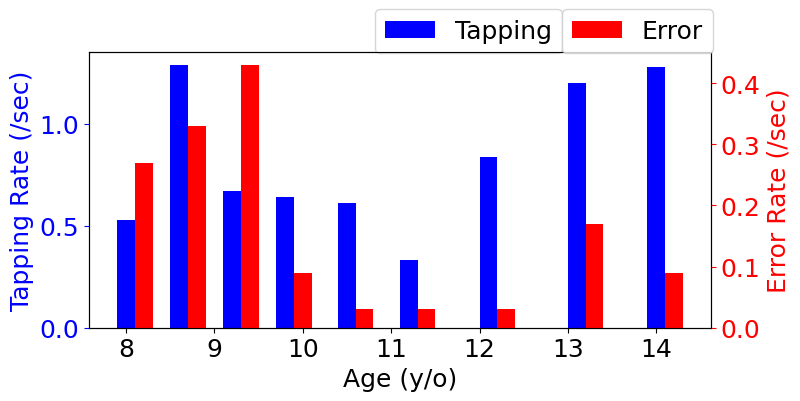

In [284]:
# label = ['Tapping Finger: Tap', 'Fixed Finger: Move Outside', 'Error' ]
# label = 'Tapping Finger: Tap'
# x = np.linspace(0, 12, 12)
# y = np.asarray(N)
# print(x)
# print(y)
# plt.plot(AGE, y, "o-", label="Tapping", color="b")
# plt.legend(numpoints=1)
# plt.legend(bbox_to_anchor=(1, 1))
# plt.ylabel('N')
# plt.xlabel('Age')
# plt.show()

plt.rcParams.update({'font.size': 18})

fig, ax1 = plt.subplots()
fig.set_size_inches(8.5, 4.5)
y = np.asarray(N)
y = y.reshape(-1)
# ax1.plot(AGE, y, '^-', label ='Tapping', color='b')
ax1.bar(x, y, width=0.2, label ='Tapping', color='b')
ax1.set_xlabel('Age')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Tapping Rate (/sec)', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(loc='upper left', bbox_to_anchor=(.44, 1.2))

ax2 = ax1.twinx()
y = np.asarray(RATE)
y = y.reshape(-1)
# ax2.plot(AGE, y, 'x--', label ='Error', color='r')
ax2.bar(x+0.2, y, width=0.2, label ='Error', color='r')
ax1.set_xlabel('Age (y/o)')
ax2.set_ylabel('Error Rate (/sec)', color='r')
# ax2.ylim(0,22)
ax2.tick_params('y', colors='r')
ax2.legend(loc='upper left', bbox_to_anchor=(.74, 1.2))

fig.tight_layout()


### Speed-accuracy statistics

In [9]:
from scipy.stats.stats import pearsonr   
x1 = np.asarray(N)
x1 = x1.reshape(-1)
x2 = np.asarray(RATE)
x2 = x2.reshape(-1)
print(x1, x2)
print(pearsonr(x1,x2))

[0.53 1.29 0.67 0.64 0.61 0.33 0.84 1.2  1.28] [0.27 0.33 0.43 0.09 0.03 0.03 0.03 0.17 0.09]
PearsonRResult(statistic=0.19167804585028184, pvalue=0.6212753484032406)


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_15745/3314224318.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
